In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torchvision.transforms import Compose, ToTensor
from torchvision.datasets import MNIST
import torch.nn as nn
from tqdm import tqdm

In [3]:
preprocess = Compose([
    ToTensor()
])

train_dataset = MNIST(root='./data', train=True, download=True, transform=preprocess)
test_dataset = MNIST(root='./data', train=False, download=True, transform=preprocess)

train_data = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_data = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=True)

In [4]:
train_data

In [5]:
data_iter = iter(train_data)
images, labels = next(data_iter)
print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


In [6]:
labels

tensor([1, 1, 4, 1, 2, 2, 6, 2, 7, 6, 3, 6, 3, 9, 1, 9, 6, 5, 2, 2, 4, 6, 8, 8,
        6, 6, 1, 7, 7, 6, 8, 3, 0, 0, 2, 7, 8, 3, 2, 6, 6, 0, 7, 6, 1, 4, 2, 7,
        7, 4, 2, 1, 6, 9, 9, 6, 7, 1, 3, 9, 7, 5, 1, 5])

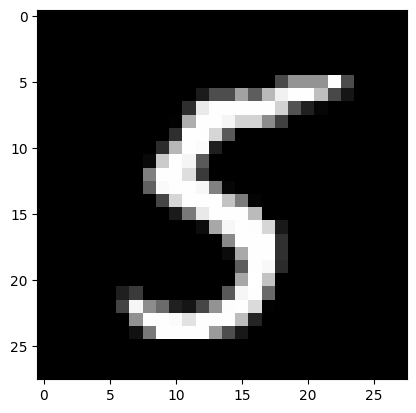

In [7]:
plt.imshow(images[-3].squeeze(), cmap='gray')
plt.show()

In [8]:
BATCH_SIZE = 64
EPOCHS = 10

In [9]:
normal_data = np.array(torch.randn(1000))

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
        0., 0., 0., 2., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 

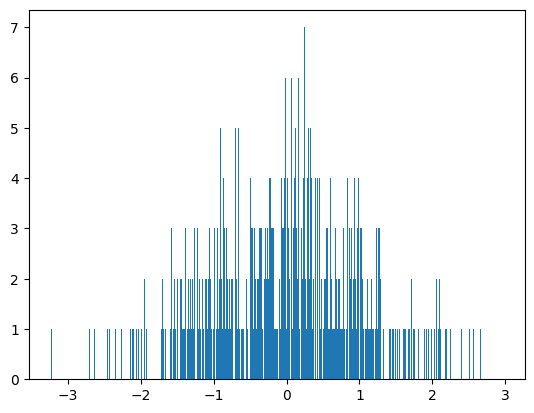

In [10]:
plt.hist(normal_data, bins=len(normal_data))

In [11]:
images[0].shape

torch.Size([1, 28, 28])

torch.Size([1, 28, 28])


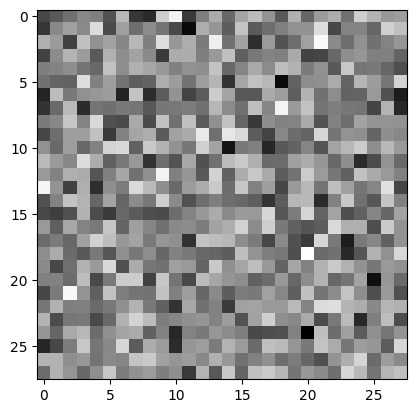

In [12]:
def forward_add_noise(image, timestep):
    noise = torch.randn(image.shape)
    # noise = torch.randn_like(image)
    return noise


noise = forward_add_noise(images[0], 1)
print(noise.shape)
plt.imshow(noise.squeeze(), cmap='gray')
plt.show()


In [13]:
T = 200
IMG_SHAPE = (28, 28, 1)
betas = np.linspace(1e-4, 0.002, T, dtype=np.float32)
alphas = 1 - betas
alphas_cumprod = np.cumprod(alphas)

In [14]:
alphas_cumprod

array([0.9999    , 0.99979043, 0.99967134, 0.9995428 , 0.99940467,
       0.99925697, 0.9990998 , 0.99893314, 0.99875695, 0.9985713 ,
       0.9983761 , 0.9981714 , 0.9979572 , 0.9977336 , 0.9975005 ,
       0.9972579 , 0.9970058 , 0.9967443 , 0.9964733 , 0.99619293,
       0.99590313, 0.99560386, 0.99529517, 0.99497706, 0.9946496 ,
       0.9943127 , 0.9939664 , 0.99361074, 0.9932457 , 0.9928714 ,
       0.9924877 , 0.99209476, 0.9916924 , 0.9912808 , 0.99085987,
       0.9904297 , 0.98999023, 0.9895415 , 0.98908347, 0.9886163 ,
       0.98813987, 0.98765427, 0.9871595 , 0.9866555 , 0.9861423 ,
       0.98561996, 0.9850885 , 0.984548  , 0.9839983 , 0.9834395 ,
       0.98287165, 0.9822948 , 0.9817089 , 0.981114  , 0.98051   ,
       0.979897  , 0.9792751 , 0.97864425, 0.97800446, 0.9773557 ,
       0.9766981 , 0.9760316 , 0.9753562 , 0.974672  , 0.97397894,
       0.9732771 , 0.9725664 , 0.971847  , 0.97111887, 0.97038203,
       0.96963644, 0.96888214, 0.9681192 , 0.9673476 , 0.96656

In [15]:
def forward(x0, t):
    noise = torch.randn((28,28))
    a_bar = np.array(alphas_cumprod[t])
    a_bar = torch.from_numpy(a_bar)
    a_bar = a_bar.reshape((1,1,1,1))
    out = torch.sqrt(a_bar) * x0 + torch.sqrt(1 - a_bar) * noise

    return out 

noisy_img = forward(images[8].squeeze(), 50)
print(noisy_img.shape)

torch.Size([1, 1, 28, 28])


10


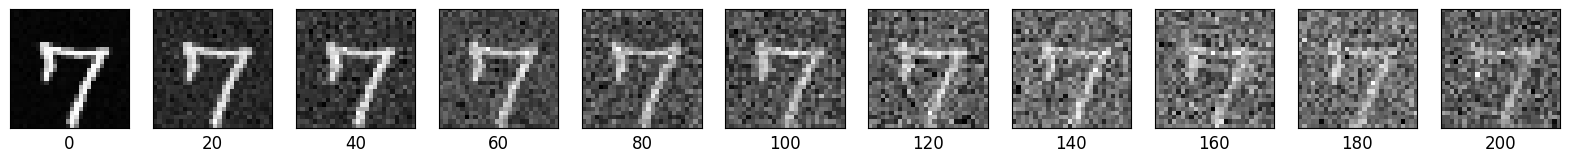

In [16]:
imgs = []
for i in range(10):
    imgs.append(torch.squeeze(forward(images[8], i*20)))
print(len(imgs))
imgs.append(torch.squeeze(forward(images[8], 199)))


plt.figure(figsize=(20, 20))
for i in range(len(imgs)):
    plt.subplot(1, 11, i+1)
    plt.imshow(imgs[i], cmap='gray')
    plt.xticks([])  #hide
    plt.yticks([])  
    plt.xlabel(str(i*20), fontsize=12)

    
plt.show()

In [17]:
print(imgs[-1].mean())
print(imgs[-1].std())

tensor(0.0914)
tensor(0.4629)


10


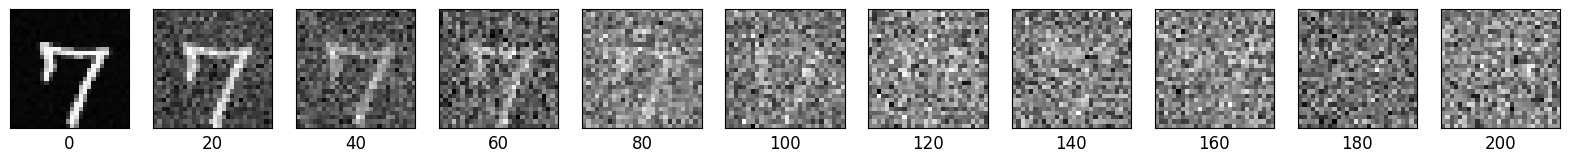

In [18]:
T = 200
IMG_SHAPE = (28, 28, 1)
betas = np.linspace(1e-4, 0.02, T, dtype=np.float32)
alphas = 1 - betas
alphas_cumprod = np.cumprod(alphas)

imgs = []
for i in range(10):
    imgs.append(torch.squeeze(forward(images[8], i*20)))
print(len(imgs))
imgs.append(torch.squeeze(forward(images[8], 199)))


plt.figure(figsize=(20, 20))
for i in range(len(imgs)):
    plt.subplot(1, 11, i+1)
    plt.imshow(imgs[i], cmap='gray')
    plt.xticks([])  #hide
    plt.yticks([])  
    plt.xlabel(str(i*20), fontsize=12)

    
plt.show()

In [19]:
print(imgs[-1].mean())
print(imgs[-1].std())

tensor(0.0261)
tensor(0.9547)


### Model

In [20]:
class simpleUNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 64, 3, padding=1)
        self.conv2 = nn.Conv2d(64, 128, 3, padding=1)
        self.conv3 = nn.Conv2d(128, 64, 3, padding=1)
        self.conv4 = nn.Conv2d(64, 1, 3, padding=1)
        self.relu = nn.ReLU()


    def forward(self, x, t):
        t = t[:, None, None, None].float() / T
        x = x + t
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x = self.relu(self.conv3(x))
        x = self.conv4(x)

        return x
    

In [21]:
model = simpleUNet()

In [22]:
print(model)

simpleUNet(
  (conv1): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(64, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu): ReLU()
)


In [23]:
model.train()

simpleUNet(
  (conv1): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(64, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu): ReLU()
)

In [38]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
import torch.nn.functional as F
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


In [40]:
def q_sample(x0, t, noise):
    # noise = torch.randn((28,28))
    a_bar = np.array(alphas_cumprod[t])
    a_bar = torch.from_numpy(a_bar)
    a_bar = a_bar.reshape((1,1,1,1))
    out = torch.sqrt(a_bar) * x0 + torch.sqrt(1 - a_bar) * noise

    return out 


In [43]:
for epoch in range(EPOCHS):
    pbar = tqdm(train_data)
    for x, _ in pbar:
        # x = x.to(device)
        t = torch.randint(0, T, (x.size(0),), device=device).long()
        noise = torch.randn_like(x)
        x_t = q_sample(x, t, noise)
        noise_pred = model(x_t, t)
        loss = F.mse_loss(noise_pred, noise)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        pbar.set_description(f"Epoch {epoch+1} | Loss: {loss.item():.4f}")

  0%|          | 0/938 [00:00<?, ?it/s]


TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.